## Mini case: visualization of high-dimensional data

### 1. PCA: important parameters (n_components)

**N_components is the dimension we need after dimensionality reduction**, that is, the number of features we need to retain after dimensionality reduction.That is, **k value to be confirmed in the second step of the dimensionality reduction process** , which is the integer in the range of [0, min(x.shape)]

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [2]:
iris = load_iris()
y = iris.target
X = iris.data

#What dimensions is X as an array?
X.shape

(150, 4)

In [3]:
# As a dataframe, what dimensions is X?
import pandas as pd
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 2. Modeling: 

In [4]:
#import PCA
pca = PCA(n_components = 2) #Instantiate
pca = pca.fit(X) #fit model
X_dr = pca.transform(X) #get new matrix
X_dr
# or X_dr = PCA(2).fit_transform(X)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

### 3. Visualize:

In [5]:
X_dr[y == 0, 0]

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978])

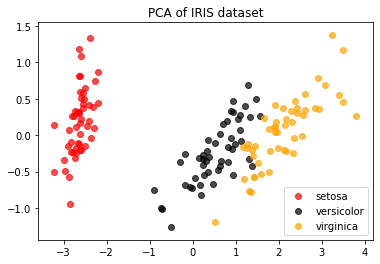

In [6]:
colors = ['red', 'black', 'orange']
iris.target_names

plt.figure()

for i in [0, 1, 2]:
    plt.scatter(X_dr[y == i, 0] ,X_dr[y == i, 1]
                ,alpha=.7 # alpha here is transparent degree
                ,c=colors[i] 
                ,label=iris.target_names[i]
                ) 

plt.legend()
plt.title('PCA of IRIS dataset') 
plt.show()

In [7]:
#explained_variance_ to see the amount of information carried on each new feature vector
# after dimensionality reduction (the size of the interpretable variance)
pca.explained_variance_ 

#first feature has big variance:

array([4.22824171, 0.24267075])

In [8]:
#explained_variance_ratio, looking at the percentage of the information in each new feature vector as a percentage 
# of the total information in the original data after dimensionality reduction
pca.explained_variance_ratio_

#variance contribution rate

array([0.92461872, 0.05306648])

In [9]:
pca.explained_variance_ratio_.sum()

0.9776852063187949

### 4. Accumulation explain_variance_contribution curve

In [10]:
pca_line = PCA().fit(X) 
pca_line.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

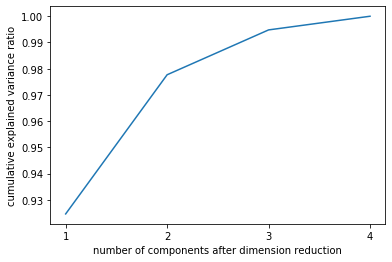

In [11]:
import numpy as np

plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_)) 
plt.xticks([1,2,3,4]) #This is to restrict the axes to appear as integers
plt.xlabel("number of components after dimension reduction") 
plt.ylabel("cumulative explained variance ratio")
plt.show()

### 5. Use maximum Likelihood to find the best n_components: 

Selecting hyperparameter method: mle

In [12]:
pca_mle = PCA(n_components="mle") 
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)
X_mle #three columns under max likelihood, which mean 3 features are the best

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [15]:
pca_mle.explained_variance_ratio_.sum() #3 columns keep 99.4%'s information compare with previous 4 features. 

0.9947878161267246

### 6. Select the hyperparameter according to the proportion of information

Enter the floating point number between [0,1] and let the parameter **svd_solver =='full'** to indicate that the proportion of total explanatory variance after dimension reduction is greater than n_components specified percentage, that is, what percentage of the information is expected to be retained.

If you want to retain 97% of the information, you can input n_components = 0.97, and PCA will automatically select the number of features that can retain more than 97% of the information.

In [22]:
pca_f = PCA(n_components=0.97,svd_solver="full")

pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
X_f

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [23]:
pca_f.explained_variance_ratio_.sum()

0.9776852063187949

### 7. PCA - SVD

- svd_solver

In [24]:
PCA(2).fit(X).components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [25]:
PCA(2).fit(X).components_.shape

(2, 4)

### 7.1 Important parameters: svd_solver 与 random_state

The parameter svd_solver is used to control some details of matrix decomposition in the dimensionality reduction process. There are four modes to choose from :"auto", "full", "arpack",

- **"Auto "**: select the resolver based on the default policy of x.shape and n_components: if the size of the input data is greater than 500x500 and the number of features to be extracted is less than 80% of the data minimum dimension min(x.shape), the more efficient" random "method is enabled.

- **"Full "**: the standard LAPACK resolver is called from scipy.linalg.svd to generate an accurate and complete SVD, which is suitable for cases with moderate data volume and sufficient computation time.

- **"Arpack "**: call arpack resolver from scipy. Sparse. Linalg. SVDS to run truncated singular value decomposition (SVD truncated), the number of features will be reduced to the value k input in n_components, can speed up the operation, suitable for the feature matrix is large, but generally used for the feature matrix is sparse matrix, this process contains some randomness.

- **"Random"**, random SVD was performed by Halko et al. 's random method. It is suitable for large eigenmatrix and large computation.

### 8. Important Attribute: components_ 

In [26]:
from sklearn.datasets import fetch_lfw_people #face dataset
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [27]:
faces = fetch_lfw_people(min_faces_per_person=60) #Instantiate
                        #minimun face for each person to store
faces.images.shape
#1348 - images numbers of matrix
#62 - row for each image feature matrix
#47 - col for each image feature matrix 

#62 * 47 = pixel

(1348, 62, 47)

In [28]:
#How to understand the dimension of this data?
faces.data.shape #2914 features .... 
#Row - samples
#Col - features

(1348, 2914)

In [29]:
#What does this matrix look like if I replace it with a matrix?
X = faces.data

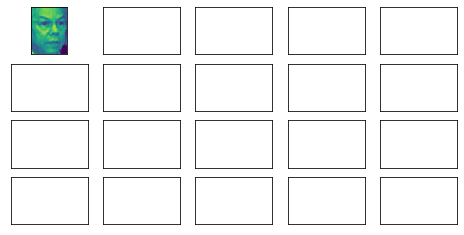

In [33]:
#Visualize:
        #subplot and figure: 4 row, 5 col 
fig, axes = plt.subplots(4,5
                        ,figsize=(8,4)
                        ,subplot_kw = {"xticks":[],"yticks":[]}) #No showing axis 

axes[0][0].imshow(faces.images[0,:,:])

In [34]:
# [*axes.flat] can covert 2D to 1D
len([*axes.flat])

20

In [36]:
[*enumerate(axes.flat)]

[(0, <matplotlib.axes._subplots.AxesSubplot at 0x1a1bae6210>),
 (1, <matplotlib.axes._subplots.AxesSubplot at 0x1a1bb24350>),
 (2, <matplotlib.axes._subplots.AxesSubplot at 0x1a1bb39350>),
 (3, <matplotlib.axes._subplots.AxesSubplot at 0x1a1c3f2650>),
 (4, <matplotlib.axes._subplots.AxesSubplot at 0x1a1c42ae50>),
 (5, <matplotlib.axes._subplots.AxesSubplot at 0x1a1f1b6650>),
 (6, <matplotlib.axes._subplots.AxesSubplot at 0x1a1f216890>),
 (7, <matplotlib.axes._subplots.AxesSubplot at 0x1a1f22c690>),
 (8, <matplotlib.axes._subplots.AxesSubplot at 0x1a1f28b910>),
 (9, <matplotlib.axes._subplots.AxesSubplot at 0x1a1f2a2710>),
 (10, <matplotlib.axes._subplots.AxesSubplot at 0x1a1f2e00d0>),
 (11, <matplotlib.axes._subplots.AxesSubplot at 0x1a1f317710>),
 (12, <matplotlib.axes._subplots.AxesSubplot at 0x1a1f354110>),
 (13, <matplotlib.axes._subplots.AxesSubplot at 0x1a1f38a750>),
 (14, <matplotlib.axes._subplots.AxesSubplot at 0x1a1f3cb150>),
 (15, <matplotlib.axes._subplots.AxesSubplot at 0x

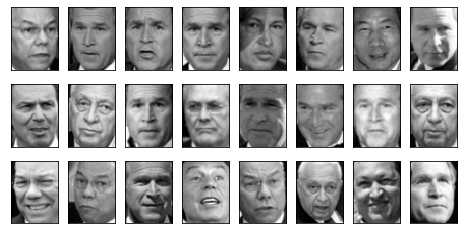

In [38]:
fig, axes = plt.subplots(3,8
                        ,figsize=(8,4)
                        ,subplot_kw = {"xticks":[],"yticks":[]})

#Fill image
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:] 
              ,cmap="gray" #choose color 
             )

### 9. Dimensionality Reduction

In [39]:
#we want to reduce feature from 2900 to 150
pca = PCA(150).fit(X) #Instantiate
V = pca.components_
V.shape #V decide new feature has what direction, what name, and meaning 

#V is new feature matrix
62* 47 = 2917 

(150, 2914)

In [52]:
V.shape

(150, 2914)

#### 9.1 Visualize the new feature space matrix

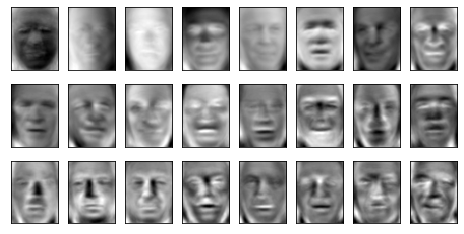

In [40]:
fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw = {"xticks":[],"yticks":[]})

for i, ax in enumerate(axes.flat): 
    ax.imshow(V[i,:].reshape(62,47),cmap="gray")

In [50]:
# What if we use pca.fit_transform ?? 
X_dr = PCA(150).fit_transform(X)

### 10. Portal: inverse_transform

In [53]:
#Modeling: after reduce feature we have matrix X_dr
X_dr = PCA(150).fit_transform(X)
X_dr.shape

(1348, 150)

In [54]:
#Use inverse_transform to return the original matrix
X_inverse = pca.inverse_transform(X_dr)
X_inverse.shape

(1348, 2914)

#### 10.1 Visualize matrix X and X_inverse

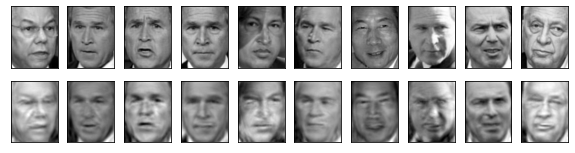

In [55]:
fig, ax = plt.subplots(2,10,figsize=(10,2.5) 
                       ,subplot_kw={"xticks":[],"yticks":[]}
                        )

for i in range(10): 
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r") 
    ax[1,i].imshow(X_inverse[i].reshape(62,47), cmap = "binary_r")

### 11. Use PCA for noise filtering

In [56]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [57]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [61]:
digits.data.shape

(1797, 64)

In [59]:
set(digits.target.tolist()) #show unique

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [64]:
digits.images.shape

(1797, 8, 8)

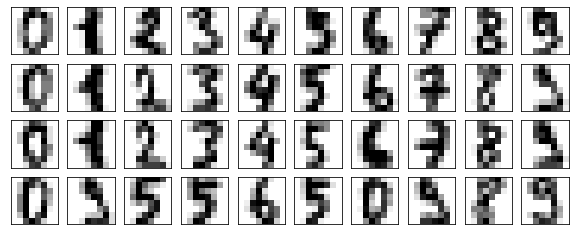

In [63]:
def plot_digits(data):
    #data's structure must be (m,n), and n can be divided into (8, 8) strcture
    fig, axes = plt.subplots(4,10,figsize=(10,4)
                            ,subplot_kw = {"xticks":[],"yticks":[]}
                            )

    for i, ax in enumerate(axes.flat):
                        # so we define n's structure here
        ax.imshow(data[i].reshape(8,8),cmap="binary") 

plot_digits(digits.data)

#### 11.1 Add noise to the data

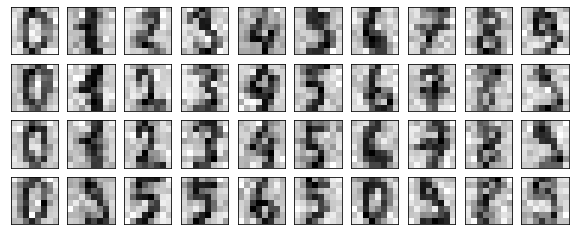

In [66]:
rng = np.random.RandomState(42)

#Random selection of normally distributed data in a given data set
#The two parameters are the specified data set and the extracted variance of the normal distribution

            #randon.normal(original dataset, size of variance)
noisy = rng.normal(digits.data,2)

plot_digits(noisy)

#### 11.2 Dimensions reduce

In [67]:
# only keep 50% of original dataset's infomation
pca = PCA(0.5, svd_solver='full').fit(noisy)
X_dr = pca.transform(noisy) 
X_dr.shape

(1797, 6)

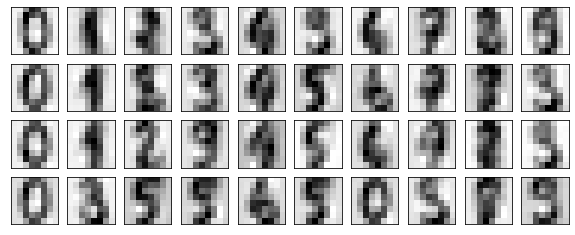

In [68]:
#Reverse dimension reduction results to achieve noise reduction
without_noise = pca.inverse_transform(X_dr)
plot_digits(without_noise)